<a href="https://colab.research.google.com/github/GithubPython7Eduard/Python-Library/blob/main/HMS_Harmful_Brain_Activity_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

Upload your Kaggle.json file

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Harmful Brain Activity Classification Dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle competitions download -c hms-harmful-brain-activity-classification

100% 18.4G/18.4G [03:06<00:00, 177MB/s]
100% 18.4G/18.4G [03:06<00:00, 106MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/hms-harmful-brain-activity-classification.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [ ]:
# loading the dataset to a Pandas DataFrame
dataset = pd.read_csv('/content/train.csv')

In [ ]:
print(dataset)

            eeg_id  eeg_sub_id  eeg_label_offset_seconds  spectrogram_id  \
0       1628180742           0                       0.0          353733   
1       1628180742           1                       6.0          353733   
2       1628180742           2                       8.0          353733   
3       1628180742           3                      18.0          353733   
4       1628180742           4                      24.0          353733   
...            ...         ...                       ...             ...   
106795   351917269           6                      12.0      2147388374   
106796   351917269           7                      14.0      2147388374   
106797   351917269           8                      16.0      2147388374   
106798   351917269           9                      18.0      2147388374   
106799   351917269          10                      20.0      2147388374   

        spectrogram_sub_id  spectrogram_label_offset_seconds    label_id  \
0          

In [ ]:
# to see the first 5 rows
dataset.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


Label Encoding

In [ ]:
# encoding "Expert_Consensus  -  Label" Column
dataset.replace({'expert_consensus':{'Seizure':0,'GRDA':1,'Other':2, 'GPD':3, 'LRDA':4, 'LPD':5}},inplace=True)

In [ ]:
# adding the 'Target' column to the data frame
dataset['label'] = dataset.expert_consensus

In [ ]:
# print last 5 rows of the dataframe
dataset.tail()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,label
106795,351917269,6,12.0,2147388374,6,12.0,4195677307,10351,4,0,0,0,3,0,0,4
106796,351917269,7,14.0,2147388374,7,14.0,290896675,10351,4,0,0,0,3,0,0,4
106797,351917269,8,16.0,2147388374,8,16.0,461435451,10351,4,0,0,0,3,0,0,4
106798,351917269,9,18.0,2147388374,9,18.0,3786213131,10351,4,0,0,0,3,0,0,4
106799,351917269,10,20.0,2147388374,10,20.0,3642716176,10351,4,0,0,0,3,0,0,4


In [ ]:
# number of rows and columns in the dataset
dataset.shape

(106800, 16)

In [ ]:
# getting some information about the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106800 entries, 0 to 106799
Data columns (total 16 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   eeg_id                            106800 non-null  int64  
 1   eeg_sub_id                        106800 non-null  int64  
 2   eeg_label_offset_seconds          106800 non-null  float64
 3   spectrogram_id                    106800 non-null  int64  
 4   spectrogram_sub_id                106800 non-null  int64  
 5   spectrogram_label_offset_seconds  106800 non-null  float64
 6   label_id                          106800 non-null  int64  
 7   patient_id                        106800 non-null  int64  
 8   expert_consensus                  106800 non-null  int64  
 9   seizure_vote                      106800 non-null  int64  
 10  lpd_vote                          106800 non-null  int64  
 11  gpd_vote                          106800 non-null  i

In [ ]:
# checking for missing values
dataset.isnull().sum()

eeg_id                              0
eeg_sub_id                          0
eeg_label_offset_seconds            0
spectrogram_id                      0
spectrogram_sub_id                  0
spectrogram_label_offset_seconds    0
label_id                            0
patient_id                          0
expert_consensus                    0
seizure_vote                        0
lpd_vote                            0
gpd_vote                            0
lrda_vote                           0
grda_vote                           0
other_vote                          0
label                               0
dtype: int64

In [ ]:
# statistical measures about the data
dataset.describe()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,label
count,1.068000e+05,106800.000000,106800.000000,1.068000e+05,106800.000000,106800.000000,1.068000e+05,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000
mean,2.104387e+09,26.286189,118.817228,1.067262e+09,43.733596,520.431404,2.141415e+09,32304.428493,2.316695,0.878024,1.138783,1.264925,0.948296,1.059185,1.966283,2.316695
std,1.233371e+09,69.757658,314.557803,6.291475e+08,104.292116,1449.759868,1.241670e+09,18538.196252,1.700546,1.538873,2.818845,3.131889,2.136799,2.228492,3.621180,1.700546
min,5.686570e+05,0.000000,0.000000,3.537330e+05,0.000000,0.000000,3.380000e+02,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.026896e+09,1.000000,6.000000,5.238626e+08,2.000000,12.000000,1.067419e+09,16707.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.071326e+09,5.000000,26.000000,1.057904e+09,8.000000,62.000000,2.138332e+09,32068.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3.172787e+09,16.000000,82.000000,1.623195e+09,29.000000,394.000000,3.217816e+09,48036.000000,4.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,4.000000
max,4.294958e+09,742.000000,3372.000000,2.147388e+09,1021.000000,17632.000000,4.294934e+09,65494.000000,5.000000,19.000000,18.000000,16.000000,15.000000,15.000000,25.000000,5.000000


In [ ]:
# checking the distribution of Target Varibale
dataset['label'].value_counts()

0    20933
1    18861
2    18808
3    16702
4    16640
5    14856
Name: label, dtype: int64

**Label explanation of alignment**

Seizure  -->  20933

GRDA     -->  18861

Other    -->  18808

GPD      -->  16702

LRDA     -->  16640

LPD      -->  14856

In [ ]:
dataset.groupby('label').mean()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
label,,,,,,,,,,,,,,,
0,2.144307e+09,7.715951,55.406105,1.067833e+09,14.002436,229.519753,2.147165e+09,31499.771652,0.0,3.149620,0.076482,0.064587,0.041848,0.015860,0.128649
1,2.122264e+09,34.889295,164.003181,1.115632e+09,44.237951,303.706590,2.139416e+09,31341.035947,1.0,0.030751,0.101161,0.196119,0.252214,4.516569,0.974286
2,2.148688e+09,3.607295,25.629307,1.073661e+09,13.892333,346.593258,2.143698e+09,33263.351287,2.0,0.155997,0.471874,0.291631,0.507337,0.702573,7.204275
3,2.112607e+09,60.594001,271.789007,1.012988e+09,75.243384,681.736199,2.137788e+09,30894.480362,3.0,1.073823,0.465932,7.136630,0.056161,0.327685,0.977967
4,2.060360e+09,41.686238,111.167668,1.046095e+09,61.317127,516.924760,2.142999e+09,33981.688041,4.0,0.141286,0.469712,0.076082,4.535697,0.437500,1.351863
5,2.009430e+09,14.422052,105.365778,1.081675e+09,67.645665,1248.156637,2.135262e+09,33153.806745,5.0,0.272079,6.303177,0.275714,0.652329,0.110057,0.982970


Separating the Features & Target

In [ ]:
X = dataset.drop(columns=['label'], axis=1)
Y = dataset['label']

In [ ]:
print(X)

            eeg_id  eeg_sub_id  eeg_label_offset_seconds  spectrogram_id  \
0       1628180742           0                       0.0          353733   
1       1628180742           1                       6.0          353733   
2       1628180742           2                       8.0          353733   
3       1628180742           3                      18.0          353733   
4       1628180742           4                      24.0          353733   
...            ...         ...                       ...             ...   
106795   351917269           6                      12.0      2147388374   
106796   351917269           7                      14.0      2147388374   
106797   351917269           8                      16.0      2147388374   
106798   351917269           9                      18.0      2147388374   
106799   351917269          10                      20.0      2147388374   

        spectrogram_sub_id  spectrogram_label_offset_seconds    label_id  \
0          

In [ ]:
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
106795    4
106796    4
106797    4
106798    4
106799    4
Name: label, Length: 106800, dtype: int64


Splitting the data into training data & Testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(106800, 15) (85440, 15) (21360, 15)


Standardized the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

Building the Neural Network

In [ ]:
# importing tensorflow and Keras
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [ ]:
# setting up the layers of Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(15, )),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(6, activation='sigmoid')
])

In [ ]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# training the Meural Network

history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
2403/2403 [==============================] - 7s 2ms/step - loss: 0.3891 - accuracy: 0.8876 - val_loss: 0.0357 - val_accuracy: 0.9970
Epoch 2/10
2403/2403 [==============================] - 5s 2ms/step - loss: 0.0182 - accuracy: 0.9989 - val_loss: 0.0087 - val_accuracy: 0.9995
Epoch 3/10
2403/2403 [==============================] - 8s 3ms/step - loss: 0.0058 - accuracy: 0.9996 - val_loss: 0.0038 - val_accuracy: 0.9996
Epoch 4/10
2403/2403 [==============================] - 8s 3ms/step - loss: 0.0025 - accuracy: 0.9999 - val_loss: 0.0019 - val_accuracy: 0.9998
Epoch 5/10
2403/2403 [==============================] - 8s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 0.9998
Epoch 6/10
2403/2403 [==============================] - 5s 2ms/step - loss: 6.1265e-04 - accuracy: 1.0000 - val_loss: 6.3325e-04 - val_accuracy: 0.9998
Epoch 7/10
2403/2403 [==============================] - 5s 2ms/step - loss: 3.2673e-04 - accuracy: 1.0000 - val_loss: 3.2310e-04

Visualizing accuracy and loss

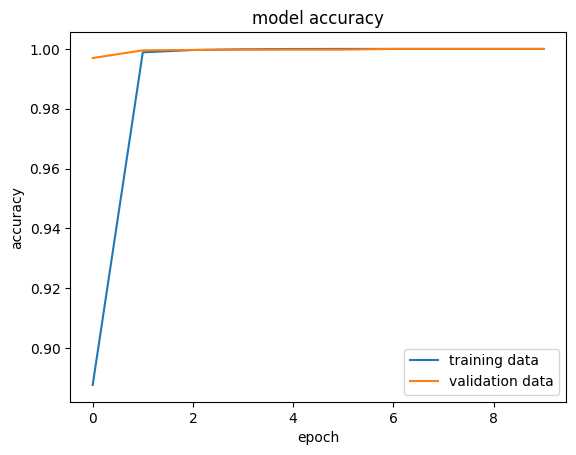

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

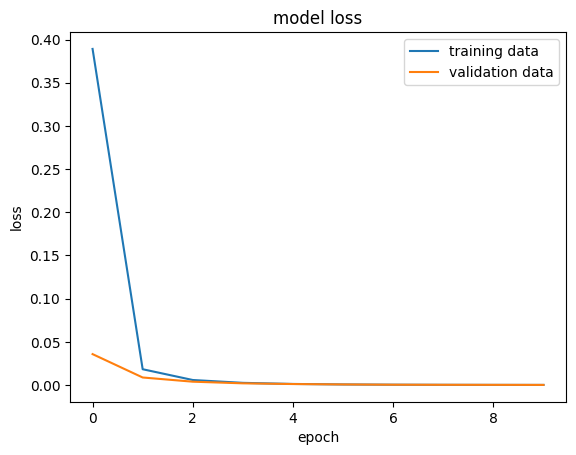

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

Accuracy of the model on test data

In [ ]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

668/668 [==============================] - 2s 3ms/step - loss: 3.4725e-04 - accuracy: 1.0000
0.9999532103538513


In [ ]:
print(X_test_std.shape)
print(X_test_std[0])

(21360, 15)
[ 1.44379336 -0.27561927 -0.28838694 -0.68355388 -0.27483507  0.12304673
  0.76820528  0.22800577 -0.77595694 -0.5691144  -0.40495261 -0.40418027
 -0.44425997  2.67069089  0.83584429]


In [ ]:
Y_pred = model.predict(X_test_std)

668/668 [==============================] - 3s 4ms/step


In [ ]:
print(Y_pred.shape)
print(Y_pred[0])

(21360, 6)
[8.5517910e-05 1.0000000e+00 9.0753514e-01 9.6609725e-09 6.3271914e-06
 4.3219655e-16]


In [ ]:
print(X_test_std)

[[ 1.44379336 -0.27561927 -0.28838694 ... -0.44425997  2.67069089
   0.83584429]
 [ 1.72841712 -0.36176809 -0.37145124 ... -0.44425997 -0.47599644
  -0.54361895]
 [-1.32455629  1.37556652  0.66365778 ...  0.49396016 -0.47599644
  -0.2677263 ]
 ...
 [ 1.67780094 -0.37612623 -0.3778408  ... -0.44425997 -0.47599644
  -0.54361895]
 [ 1.4499938  -0.37612623 -0.3778408  ... -0.44425997 -0.47599644
   0.00816634]
 [-1.23564039 -0.23254486 -0.31394519 ...  1.90129035 -0.47599644
   0.00816634]]


In [ ]:
print(Y_pred)

[[8.55179096e-05 1.00000000e+00 9.07535136e-01 9.66097247e-09
  6.32719139e-06 4.32196550e-16]
 [1.00000000e+00 1.99939893e-03 2.00057286e-08 5.60712365e-10
  7.41130027e-15 6.16026652e-13]
 [1.46343951e-10 3.23860383e-11 2.40170484e-04 9.82804373e-02
  9.99996185e-01 8.66900012e-03]
 ...
 [5.59999401e-14 3.25893428e-15 1.13843726e-10 6.02382600e-01
  9.63772118e-01 1.00000000e+00]
 [2.34942101e-02 1.19628794e-01 9.99998093e-01 3.50106955e-02
  3.59247701e-06 6.52531085e-11]
 [7.30199575e-15 1.34951724e-16 9.25826740e-08 3.02104023e-03
  9.99999881e-01 9.97578561e-01]]


model.predict() gives the prediction probability of each class for that data point

In [ ]:
#  argmax function explanation

my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [ ]:
# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 0, 4, 3, 3, 5, 1, 3, 2, 0, 3, 2, 3, 2, 5, 1, 1, 5, 1, 4, 1, 1, 0, 4, 1, 3, 5, 2, 3, 1, 0, 0, 1, 5, 0, 1, 2, 1, 3, 0, 5, 5, 1, 1, 5, 5, 3, 0, 5, 3, 4, 4, 2, 3, 4, 1, 0, 2, 5, 3, 5, 2, 2, 2, 2, 0, 1, 3, 4, 2, 0, 5, 3, 3, 1, 1, 5, 4, 3, 3, 4, 3, 4, 1, 1, 1, 4, 4, 0, 1, 2, 2, 5, 5, 4, 3, 1, 2, 0, 2, 5, 3, 1, 0, 4, 3, 0, 2, 4, 1, 3, 0, 2, 2, 2, 3, 5, 2, 0, 5, 1, 1, 5, 5, 3, 3, 0, 5, 0, 3, 4, 1, 3, 4, 2, 2, 1, 1, 0, 1, 4, 4, 4, 2, 4, 0, 2, 3, 0, 1, 4, 1, 0, 0, 5, 4, 4, 3, 1, 1, 5, 1, 5, 1, 3, 3, 0, 3, 3, 4, 4, 3, 3, 0, 5, 5, 2, 4, 5, 3, 4, 0, 0, 3, 0, 5, 3, 1, 4, 0, 0, 2, 0, 3, 3, 1, 4, 4, 4, 2, 3, 5, 0, 2, 3, 0, 3, 0, 0, 3, 5, 3, 5, 1, 4, 5, 3, 0, 2, 0, 1, 4, 1, 0, 2, 2, 1, 2, 5, 0, 4, 3, 0, 0, 4, 4, 0, 3, 1, 0, 0, 2, 2, 0, 4, 4, 5, 4, 0, 1, 4, 0, 0, 5, 5, 1, 4, 1, 4, 2, 0, 3, 5, 1, 5, 3, 4, 2, 2, 1, 1, 3, 3, 0, 2, 0, 3, 0, 0, 2, 5, 2, 4, 0, 1, 5, 0, 1, 3, 0, 2, 2, 5, 4, 5, 4, 0, 5, 3, 0, 3, 4, 4, 3, 3, 5, 4, 0, 0, 3, 5, 4, 5, 5, 5, 3, 0, 0, 0, 1, 1, 0, 4, 2, 3, 4, 2, 0, 5, 2, 5, 1, 4, 

Building the predictive system

In [ ]:
# input data  -->  this is where we access the EEG data
input_data = (2, 3, 1, 2, 5, 4, 0, 1, 5, 0, 2, 2, 3, 0, 4)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The classify is Seizure')

elif(prediction_label[0] == 1):
  print('The classify is GRDA')

elif(prediction_label[0] == 2):
  print('The classify is Other')

elif(prediction_label[0] == 3):
  print('The classify is GPD')

elif(prediction_label[0] == 4):
  print('The classify is LRDA')

else:
  print('The classify is LPD')

1/1 [==============================] - 0s 38ms/step
[[5.3403012e-14 1.2939124e-13 1.9569338e-08 8.9986749e-02 9.9938697e-01
  9.9999338e-01]]
[5]
The classify is LPD


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
